<a href="https://colab.research.google.com/github/huyphangia/CS114.K21.KHTN/blob/master/Lab06_Your_First_Machine_Learning_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**1. Downloading, Installing and Starting Python SciPy** 

###**1.1 Install SciPy Libraries**

In [1]:
# install numpy
!pip install numpy


In [2]:
# install scipy
!pip install scipy

In [3]:
# install pandas
!pip install pandas

In [4]:
# install matplotlib
!pip install matplotlib

In [5]:
# install sklearn
!pip install sklearn

###**1.2 Start Python and Check Versions**

In [6]:
# Check the versions of libraries

# Python version
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy
print('numpy: {}'.format(numpy.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas
print('pandas: {}'.format(pandas.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))

Python: 3.6.9 (default, Jul 17 2020, 12:50:27) 
[GCC 8.4.0]
scipy: 1.4.1
numpy: 1.18.5
matplotlib: 3.2.2
pandas: 1.0.5
sklearn: 0.22.2.post1


##**2. Load The Data**

###**2.1 Import Libraries**

> [pandas.read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)

In [7]:
from pandas import read_csv

> [pandas.plotting.scatter_matrix](https://pandas.pydata.org/docs/reference/api/pandas.plotting.scatter_matrix.html)

In [8]:
from pandas.plotting import scatter_matrix

> [matplotlib.pyplot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.html#module-matplotlib.pyplot)

In [9]:
from matplotlib import pyplot

[sklearn.model_selection](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection) :
> [sklearn.model_selection.train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split)
>
> [sklearn.model_selection.cross_val_score](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score)
>
> [sklearn.model_selection.StratifiedKFold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html#sklearn.model_selection.StratifiedKFold)

In [10]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold

[sklearn.metrics](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics) :
> [sklearn.metrics.classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html#sklearn.metrics.classification_report)
>
> [sklearn.metrics.confushion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix)
> 
> [sklearn.metrics.accuracy_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score)

In [11]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

###**2.2 Load Dataset:**

In [13]:
# Load dataset
# Load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = read_csv(url, names=names)

print(dataset)

     sepal-length  sepal-width  petal-length  petal-width           class
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]


**Or using datasets module in sklearn :** 

In [14]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

print(iris_dataset.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


##**3. Summarize the Dataset**

###**3.1 Dimensions of Dataset**

In [15]:
# shape
print(dataset.shape)

(150, 5)


###**3.2 Peek at the Data**

In [16]:
# head
print(dataset.head(10))

   sepal-length  sepal-width  petal-length  petal-width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
5           5.4          3.9           1.7          0.4  Iris-setosa
6           4.6          3.4           1.4          0.3  Iris-setosa
7           5.0          3.4           1.5          0.2  Iris-setosa
8           4.4          2.9           1.4          0.2  Iris-setosa
9           4.9          3.1           1.5          0.1  Iris-setosa


In [17]:
# tail
print(dataset.tail(10))

     sepal-length  sepal-width  petal-length  petal-width           class
140           6.7          3.1           5.6          2.4  Iris-virginica
141           6.9          3.1           5.1          2.3  Iris-virginica
142           5.8          2.7           5.1          1.9  Iris-virginica
143           6.8          3.2           5.9          2.3  Iris-virginica
144           6.7          3.3           5.7          2.5  Iris-virginica
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica


###**3.3 Statistical Summary**

In [18]:
# decriptions
print(dataset.describe())

       sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


###**3.4 Class Distribution**

In [19]:
# class distribution
print(dataset.groupby('class').size())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


###**3.5 Complete Example**

In [20]:
# summarize the data
from pandas import read_csv
# Load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = read_csv(url, names=names)
# shape
print(dataset.shape)
# head
print(dataset.head(20))
# descriptions
print(dataset.describe())
# class distribution
print(dataset.groupby('class').size())

(150, 5)
    sepal-length  sepal-width  petal-length  petal-width        class
0            5.1          3.5           1.4          0.2  Iris-setosa
1            4.9          3.0           1.4          0.2  Iris-setosa
2            4.7          3.2           1.3          0.2  Iris-setosa
3            4.6          3.1           1.5          0.2  Iris-setosa
4            5.0          3.6           1.4          0.2  Iris-setosa
5            5.4          3.9           1.7          0.4  Iris-setosa
6            4.6          3.4           1.4          0.3  Iris-setosa
7            5.0          3.4           1.5          0.2  Iris-setosa
8            4.4          2.9           1.4          0.2  Iris-setosa
9            4.9          3.1           1.5          0.1  Iris-setosa
10           5.4          3.7           1.5          0.2  Iris-setosa
11           4.8          3.4           1.6          0.2  Iris-setosa
12           4.8          3.0           1.4          0.1  Iris-setosa
13         

##**4. Data Visualization**

###**4.1 Univariate Plots**

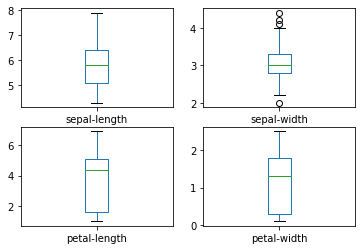

In [21]:
# box and whisker plots
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
pyplot.show()

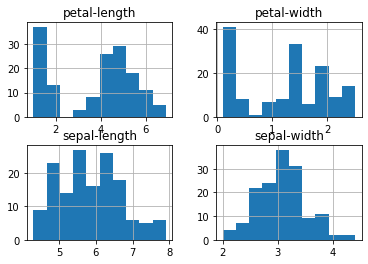

In [22]:
# histograms
dataset.hist()
pyplot.show()

###**4.2 Multivariate Plots**

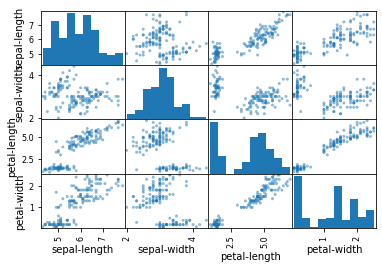

In [23]:
# scatter plot matrix
scatter_matrix(dataset)
pyplot.show()

###**4.3 Other Plots**

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**1. Describe the data**

Text(0.5, 1.0, 'General Statistics of Iris Dataset')

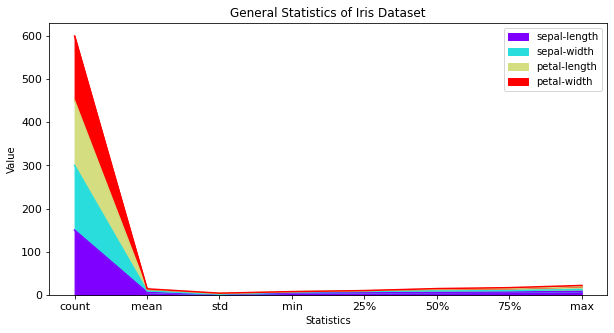

In [25]:
dataset.describe().plot(kind = "area",fontsize=11, figsize = (10,5), table = False,colormap="rainbow")
plt.xlabel('Statistics',)
plt.ylabel('Value')
plt.title("General Statistics of Iris Dataset")

**2. Bar plot**

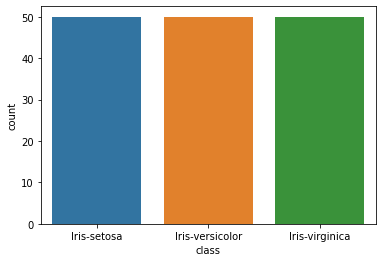

In [26]:
sns.countplot('class',data=dataset)
plt.show()

**3. Pie plot**

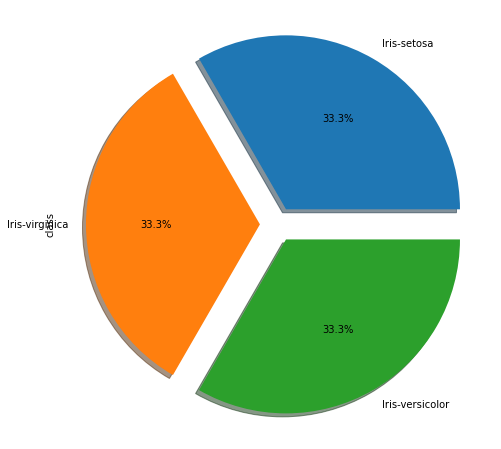

In [27]:
dataset['class'].value_counts().plot.pie(explode=[0.1,0.1,0.1],autopct='%1.1f%%',shadow=True,figsize=(10,8))

**4. Pair plot**

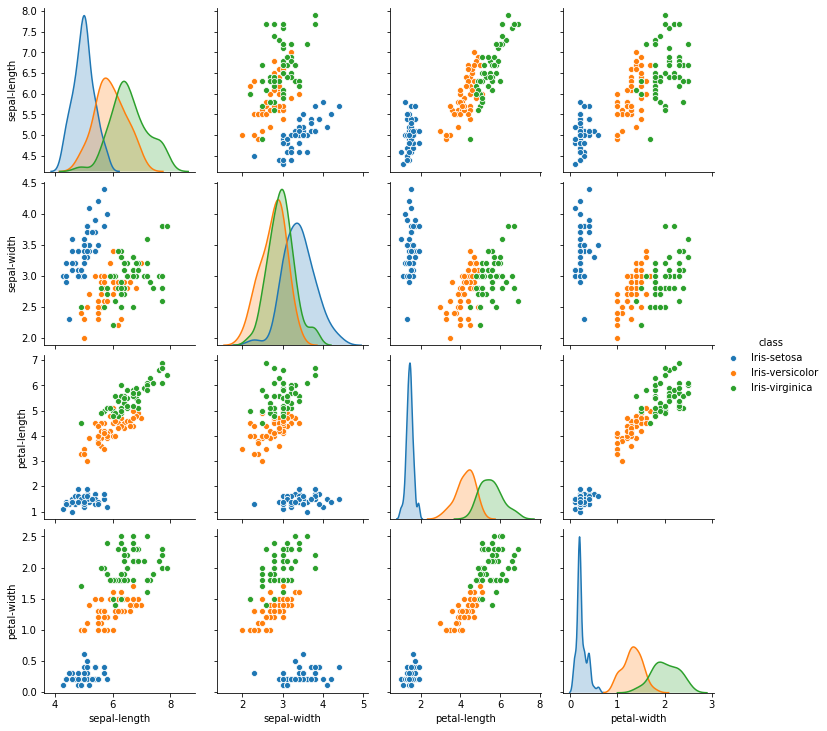

In [28]:
sns.pairplot(dataset,hue='class')

**5. Area plot**

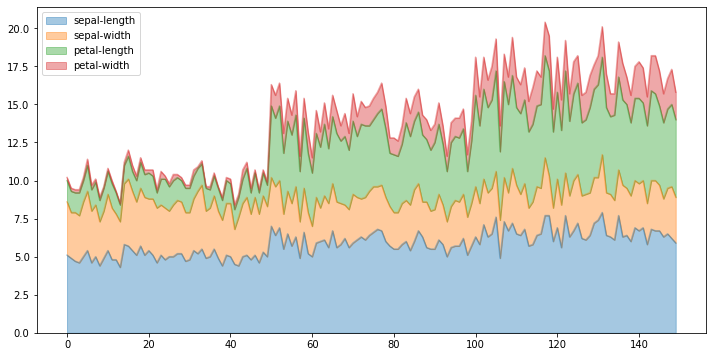

In [29]:
dataset.plot.area(y=['sepal-length','sepal-width','petal-length','petal-width'],alpha=0.4,figsize=(12, 6));

###**4.3 Complete Example**

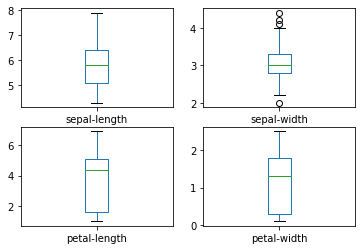

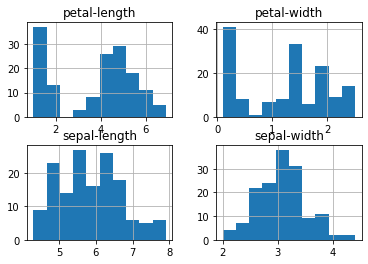

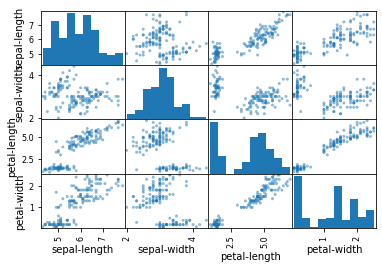

In [30]:
# visualize the data
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
# Load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = read_csv(url, names=names)
# box and whisker plots
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
pyplot.show()
# histograms
dataset.hist()
pyplot.show()
# scatter plot matrix
scatter_matrix(dataset)
pyplot.show()

##**5. Evaluate Some Algorithms**

###**5.1 Create a Validation Dataset**

In [31]:
# Split-out validation dataset
array = dataset.values
X = array[:,0:4]
y = array[:,4]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)

###**5.2 Test Harness**

In [32]:

kfold = StratifiedKFold(n_splits=3, random_state=1,shuffle=True)
# enumerate splits
for train, test in kfold.split(dataset,y):
	print('train: {},\n test: {}\n'.format(train, test))

train: [  0   1   2   3   6   7   8   9  10  11  12  13  14  15  16  17  18  20
  21  22  23  24  26  28  30  31  32  33  34  35  38  48  49  50  51  52
  55  57  58  59  60  61  63  64  65  68  69  70  71  73  74  75  76  78
  80  81  82  83  84  85  86  89  91  93  95  96 101 102 103 105 106 107
 108 109 110 112 114 115 118 119 120 121 122 123 124 126 128 129 130 131
 133 134 135 136 137 139 142 143 146 147],
 test: [  4   5  19  25  27  29  36  37  39  40  41  42  43  44  45  46  47  53
  54  56  62  66  67  72  77  79  87  88  90  92  94  97  98  99 100 104
 111 113 116 117 125 127 132 138 140 141 144 145 148 149]

train: [  1   2   3   4   5   6   8  11  13  15  16  19  20  22  25  27  29  31
  32  36  37  38  39  40  41  42  43  44  45  46  47  48  49  52  53  54
  56  57  58  59  60  62  64  66  67  68  70  72  73  74  76  77  79  80
  81  82  84  86  87  88  90  92  94  95  97  98  99 100 102 104 105 108
 109 111 113 114 115 116 117 118 119 120 122 125 126 127 132 133 136 137
 

###**5.3 Build Models**

**Let's test 8 different algorithms:**
> 1. Logistic Regression (LR).
>
> 2. Linear Discriminant Analysis (LDA).
>
> 3. K-Nearest Neighboor (KNN).
>
> 4. Classification and Regression Trees (CART).
>
> 5. Gaussian Naive Bayes (NB).
>
> 6. Support Vector Machines (SVM).
>
> 7. Random Forest Classification (RFC)
>
> 8. Stacking Classifier (StackC)
 

In [33]:
# spot check algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('RFC',RandomForestClassifier(n_estimators=10)))



estimators = [('KNN', KNeighborsClassifier()),('LDA', LinearDiscriminantAnalysis())]
models.append(('StackC',StackingClassifier(estimators=estimators, final_estimator=SVC(gamma='auto'))))

In [34]:
# evaluate each model in turn 
results = []
names = []

for name, model in models:
    kfold = StratifiedKFold(n_splits=15, random_state=1,shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('{}: {:.6f} ({:.6f})'.format(name, float(cv_results.mean()), float(cv_results.std())))

LR: 0.950000 (0.061237)
LDA: 0.975000 (0.050000)
KNN: 0.958333 (0.058926)
CART: 0.958333 (0.058926)
NB: 0.950000 (0.076376)
SVM: 0.983333 (0.042492)
RFC: 0.941667 (0.062361)
StackC: 0.983333 (0.042492)


### **5.4 Select Best Model**


**Running the example above, we get the following raw results:**
> LR: 0.960897 (0.052113)
>
> LDA: 0.973974 (0.040110)
>
> KNN: 0.957191 (0.043263)
>
> CART: 0.957191 (0.043263)
>
> NB: 0.948858 (0.056322)
>
> SVM: 0.983974 (0.032083)
>
> RFC: 0.925000 (0.109924)
>
> StackC: 0.983333 (0.042492)


**What scores did you get?**


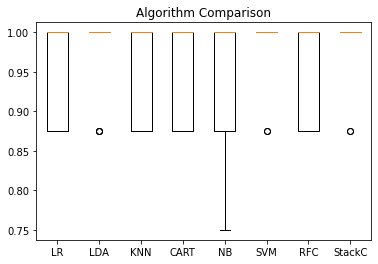

In [35]:
# Compare Algorithms
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

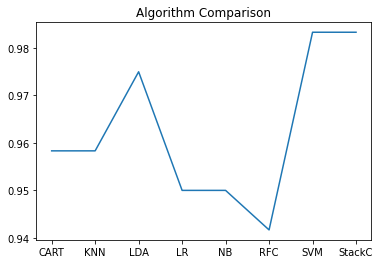

In [36]:
mean_results = numpy.array(results).mean(axis=1).tolist()
sns.lineplot(names,mean_results,)
pyplot.title('Algorithm Comparison')
pyplot.show()

###**5.5 Complete Example**

LR: 0.941667 (0.065085)
LDA: 0.975000 (0.038188)
KNN: 0.958333 (0.041667)
CART: 0.941667 (0.053359)
NB: 0.950000 (0.055277)
SVM: 0.983333 (0.033333)
RFC: 0.958333 (0.041667)
StackC: 0.983333 (0.033333)


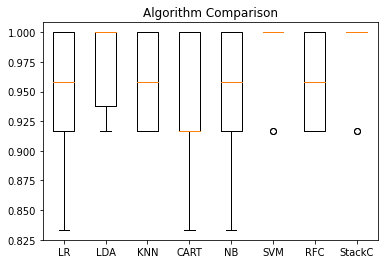

In [37]:
# compare algorithms
from pandas import read_csv
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


# Load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = read_csv(url, names=names)

# Split-out validation dataset
array = dataset.values
X = array[:,0:4]
y = array[:,4]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1, shuffle=True)

# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('RFC',RandomForestClassifier(n_estimators=10)))

estimators = [('KNN', KNeighborsClassifier()),('LDA', LinearDiscriminantAnalysis())]
models.append(('StackC',StackingClassifier(estimators=estimators, final_estimator=SVC(gamma='auto'))))

# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

# Compare Algorithms
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

##**6. Make Predictions**

###**6.1 Make Predictions**

In [38]:
# Make predictions on validation dataset
model = SVC(gamma='auto')
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

###**6.2 Evaluate Predictions**

In [39]:
# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9666666666666667
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



###**6.3 Complete Example**

In [40]:
# make predictions
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
# Load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = read_csv(url, names=names)
# Split-out validation dataset
array = dataset.values
X = array[:,0:4]
y = array[:,4]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)
# Make predictions on validation dataset
model = SVC(gamma='auto')
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)
# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9666666666666667
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30

